### PCA analysis

The video with detection box overlay is here: http://ml2dns.southcentralus.cloudapp.azure.com:8080/video/show?video_id=595613032

In [1]:
import numpy as np
import pandas as pd
import glob, os
import itertools
import matplotlib.image as mpimg
import cv2

import classifier

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
net_main_1, meta_main_1 = classifier.load_net("/data/yolo/model/yolo-obj.cfg", "/mnt/weights/backup.1719.strict/yolo-obj_4368.weights", "/data/yolo/model/obj.data.1719.strict")

#### For video `595613032`, load the "good" frames and "bad"' frames separately and get all detections greater than 0.25

In [51]:
file_list_bad = sorted(glob.glob('/data/yolo/mynotebooks/validation/bad/595613032-*.jpg'))
file_list_good = sorted(glob.glob('/data/yolo/mynotebooks/validation/good/595613032-*.jpg'))

In [52]:
detections_bad = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_bad]
detections_good = [classifier.detect(net_main_1, meta_main_1, cv2.imread(f), thresh=0.25) for f in file_list_good]

from functools import reduce
detections_bad = reduce(lambda x, y: x+y, detections_bad)
detections_good = reduce(lambda x, y: x+y, detections_good)
df_good = pd.concat((pd.DataFrame(data=[d[1] for d in detections_good], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_good], columns=['x', 'y', 'w', 'h'])), axis=1)
df_bad = pd.concat((pd.DataFrame(data=[d[1] for d in detections_bad], columns=['p']), pd.DataFrame(data=[d[2] for d in detections_bad], columns=['x', 'y', 'w', 'h'])), axis=1)

#### Plot for all "good" frames along the time line

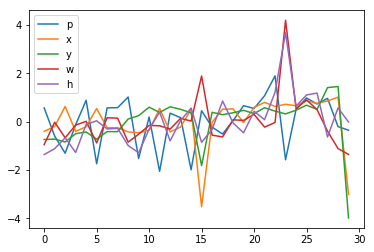

In [50]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df_bad), index=df_bad.index, columns=df_bad.columns)
df.plot()

#### Plot top 5 detections for all "bad" frames along the time line

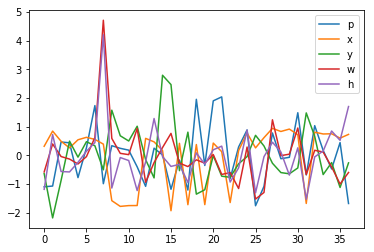

In [49]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df_good), index=df_good.index, columns=df_good.columns)
df.plot()

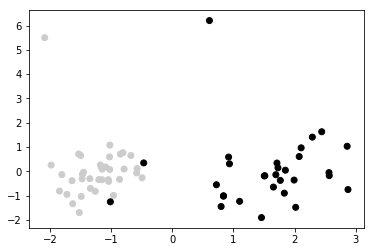

In [71]:
df = pd.DataFrame(np.vstack((df_good.values, df_bad.values)), columns=df_good.columns)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

colors = np.hstack((np.repeat(0, df_good.values.shape[0]), np.repeat(1, df_bad.values.shape[0])))
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=colors, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))